<a href="https://colab.research.google.com/github/julioalexandre/-Data-Analytics-for-Lean-Six-Sigma/blob/master/1801_exercicio2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercicio


*   Qual a média e o desvio padrão para a variavel "total time"
*   Quantas recuperações são tratadas em até 15 dias?
*   A distribuição é simetrica?
*   Que tipo de reclamação ocorre com mais frequência? 





# Importando os dados e tratando as variavéis

In [ ]:
import pandas as pd
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns
import random
plt.style.use('ggplot')

In [17]:
#Adiquirindo o dataset
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/julioalexandre/-Data-Analytics-for-Lean-Six-Sigma/master/investigation.csv


--2021-01-19 20:33:03--  https://raw.githubusercontent.com/julioalexandre/-Data-Analytics-for-Lean-Six-Sigma/master/investigation.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25120 (25K) [text/plain]
Saving to: ‘investigation.csv’

investigation.csv   100%[===================>]  24.53K  --.-KB/s    in 0.002s  

2021-01-19 20:33:03 (12.7 MB/s) - ‘investigation.csv’ saved [25120/25120]



In [18]:
#importando o dataset
df_inv = pd.read_csv("investigation.csv", sep=';')

In [20]:
#Verificando as 5 primeiras linhas do dataset
df_inv.head()

,Case number,Sender-id,Type,Total time,Time open,Time pending,Time closed,Number of pending iterations
0,GR0400250011,BSABESBB,AN,"29,73","20,80","8,93","0,00",3
1,GR0400250015,BDCCANCU,OX,"6,83","5,54","1,29","0,00",2
2,GR0400250022,CITIUS33,NU,"6,86","6,86","0,00","0,00",0
3,GR0400250023,BOFMCAM2,NU,"6,93","4,77","2,16","0,00",1
4,GR0400250024,BFICCUHH,OX,"19,81","0,28","19,52","0,00",4


In [21]:
#verifcando as ultimas 5 linhas do dataset
df_inv.tail()

,Case number,Sender-id,Type,Total time,Time open,Time pending,Time closed,Number of pending iterations
516,GR0400650518,CRLYFRPP,DD,"0,04","0,04","0,00","0,00",0
517,GR0400650519,CRLYFRPP,DD,"1,04","1,04","0,00","0,00",0
518,GR0400650520,RBTTSRPA,OX,"1,82","0,77","1,05","0,00",1
519,GR0400650523,TRMEZWHA,WX,"2,78","1,46","0,00","1,32",0
520,GR0400650531,AKBKGB2L,BC,"0,00",0,0,0,0


In [24]:
#Verificando os tipos das variaveis
df_inv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Case number                   521 non-null    object
 1   Sender-id                     521 non-null    object
 2   Type                          521 non-null    object
 3   Total time                    521 non-null    object
 4   Time open                     521 non-null    object
 5   Time pending                  521 non-null    object
 6   Time closed                   521 non-null    object
 7   Number of pending iterations  521 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 32.7+ KB


#Notei que as variaveis ***Total time, Time open, Time pending e Time closed*** são variaveis numéricas porem foram importadas como object. Vou trasforma-las em numéricas.

In [25]:
#Selecionando as variaveis as quais devemos transformar em numerico, neste caso flaot64
cols2 = ['Total time','Time open', 'Time pending','Time closed']

In [30]:
#Como o dataset continha virgulas separando as casas decimais, vamos substitui-las pelo ponto.
x = 0
while x < 4:
    df_inv[cols2[x]] = df_inv[cols2[x]].str.replace(',','.')
    x+= 1
df_inv.head()

In [34]:
#Agora vou converter do tipo object para o tipo float64 as variaveis Total time, Time open, Time pending e Time closed
x = 0
while x < 4:
    df_inv[cols2[x]] = df_inv[cols2[x]].astype(float64)
    x+= 1
df_inv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Case number                   521 non-null    object 
 1   Sender-id                     521 non-null    object 
 2   Type                          521 non-null    object 
 3   Total time                    521 non-null    float64
 4   Time open                     521 non-null    float64
 5   Time pending                  521 non-null    float64
 6   Time closed                   521 non-null    float64
 7   Number of pending iterations  521 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 32.7+ KB


#Qual a média e o desvio padrão para a variavel "total time" ?

In [104]:
df_inv["Total time"].describe()

count    521.000000
mean       9.422342
std       12.660866
min        0.000000
25%        1.040000
50%        4.070000
75%       11.850000
max       59.800000
Name: Total time, dtype: float64

In [60]:
print(f'A média é de: {df_inv["Total time"].describe()[1]}, e o desvio padrão de: {df_inv["Total time"].describe()[2]} ')



A média é de: 9.422341650671784, e o desvio padrão de: 12.660865593751883 


#Quantas recuperações são tradas em até 15 dias?

In [96]:
tempo15 = df_inv[df_inv["Total time"] <= 15]

In [120]:
print(f'Em até 15 dias foram tratas {len(tempo15)} recuperações. Conrespondem a {len(tempo15)/len(df_inv)*100} %')

Em até 15 dias foram tratas 407 recuperações. Conrespondem a 78.1190019193858 %


#A distribuição é simétrica?

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


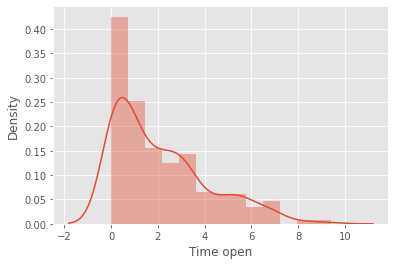

In [100]:
sns.distplot(tempo15['Time open'])

In [105]:
print(f' Neste caso a distribuição é assimétrica. Há uma alta concentração de dados nos valores mais baixos.\n A cauda mais longa da distribuição fica à direita, indicando a ocorrência de valores altos com baixa frequência.\n Esse tipo de distribuição é denominada assimétrica positiva ou à direita,')

 Neste caso a distribuição é assimétrica. Há uma alta concentração de dados nos valores mais baixos.
 A cauda mais longa da distribuição fica à direita, indicando a ocorrência de valores altos com baixa frequência.
 Esse tipo de distribuição é denominada assimétrica positiva ou à direita,


#Que tipo de reclamação ocorre com mais frequência?

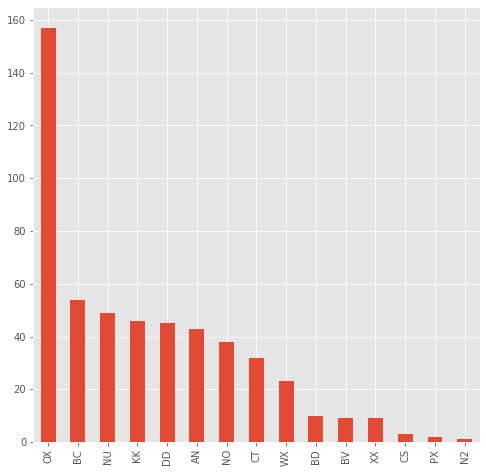

In [106]:
#Grafico de barras / variavél categórica.
df_inv.Type.value_counts().plot(kind='bar', figsize=(8, 8))
plt.show()

In [118]:
print(f'Com {df_inv["Type"].value_counts().max()} observações, OX é o tipo de reclamação mais frequênte.')

Com 157 observações, OX é o tipo de reclamação mais frequênte.
